In [ ]:
##############################
## 1. Lane Segmentation
## 2. Lane Line Segmentation
## 3. Lane Detection - obj. det.
##############################

##############################
## 1. UNet
## 2. SegNet
## 3. YOLOv8
##############################

Mounting Drive

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
%pwd

'/content'

In [3]:
%cd /content/gdrive/MyDrive/YOLOv8 Projects/Self Driving Car Project/Lane Detection - Deep Learning

/content/gdrive/MyDrive/YOLOv8 Projects/Self Driving Car Project/Lane Detection - Deep Learning


Environment

In [4]:
%pip install ultralytics

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.218 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.9/78.2 GB disk)


Test - CLI

In [6]:
!yolo segment predict model=yolov8l-seg.pt source="https://media-cdn.tripadvisor.com/media/photo-s/15/26/b8/f3/generala-drapsina-street.jpg"

100% 88.1M/88.1M [00:00<00:00, 180MB/s]
Ultralytics YOLOv8.0.218 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8l-seg summary (fused): 295 layers, 45973568 parameters, 0 gradients, 220.5 GFLOPs

100% 69.5k/69.5k [00:00<00:00, 3.60MB/s]
image 1/1 /content/gdrive/MyDrive/YOLOv8 Projects/Self Driving Car Project/Lane Detection - Deep Learning/generala-drapsina-street.jpg: 448x640 10 cars, 216.6ms
Speed: 11.2ms preprocess, 216.6ms inference, 319.6ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/segment/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


[INFO] - 1:  (371, 550, 3)
[INFO] - 2:  (431, 640, 3)


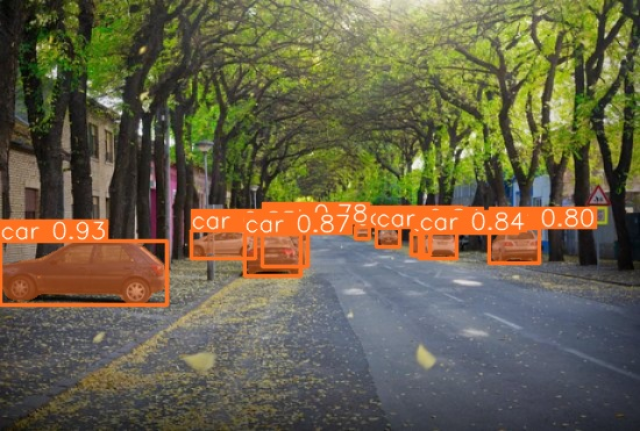

In [7]:
import cv2
import imutils
from google.colab.patches import cv2_imshow

path = "runs/segment/predict/generala-drapsina-street.jpg"
img = cv2.imread(path)
print("[INFO] - 1: ",img.shape)

img = imutils.resize(img, width=640)
print("[INFO] - 2: ",img.shape)

cv2_imshow(img)

In [9]:
!yolo segment predict model=yolov8l-seg.pt source="https://media-cdn.tripadvisor.com/media/photo-s/15/26/b8/f3/generala-drapsina-street.jpg" --hide_labels=True --boxes=False

WARNING ⚠️ '--hide_labels=True' does not require leading dashes '--', updating to 'hide_labels=True'.
WARNING ⚠️ '--boxes=False' does not require leading dashes '--', updating to 'boxes=False'.
WARNING ⚠️ 'hide_labels' is deprecated and will be removed in 'ultralytics 8.2' in the future. Please use 'show_labels' instead.
WARNING ⚠️ 'boxes' is deprecated and will be removed in 'ultralytics 8.2' in the future. Please use 'show_boxes' instead.
Ultralytics YOLOv8.0.218 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8l-seg summary (fused): 295 layers, 45973568 parameters, 0 gradients, 220.5 GFLOPs

Found https://media-cdn.tripadvisor.com/media/photo-s/15/26/b8/f3/generala-drapsina-street.jpg locally at generala-drapsina-street.jpg
image 1/1 /content/gdrive/MyDrive/YOLOv8 Projects/Self Driving Car Project/Lane Detection - Deep Learning/generala-drapsina-street.jpg: 448x640 10 cars, 169.5ms
Speed: 2.6ms preprocess, 169.5ms inference, 164.1ms postprocess per image at shape

[INFO] - 1:  (371, 550, 3)
[INFO] - 2:  (431, 640, 3)


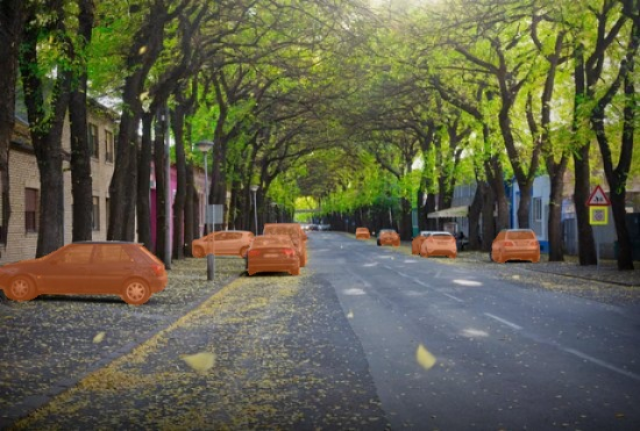

In [10]:
import cv2
import imutils
from google.colab.patches import cv2_imshow

path = "runs/segment/predict2/generala-drapsina-street.jpg"
img = cv2.imread(path)
print("[INFO] - 1: ",img.shape)

img = imutils.resize(img, width=640)
print("[INFO] - 2: ",img.shape)

cv2_imshow(img)

Test - Python Implementation

In [ ]:
# # # # # # # # # # # # # # # #
# 1. Library
# 2. Image & Model
# 3. Prediction & Score
# 4. Show Result
# # # # # # # # # # # # # # # #

Training

In [ ]:
!unzip data/dataset.zip -d ./data

In [13]:
!yolo segment train model=yolov8l-seg.pt data=data/config.yaml imgsz=640 workers=8 batch=8 device=0 epochs=250 name=yolov8_lane_segmentation

Ultralytics YOLOv8.0.218 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8l-seg.pt, data=data/config.yaml, epochs=250, patience=50, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=yolov8_lane_segmentation, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, format=torchscript, k

In [ ]:
# !yolo segment train model=runs/.... resume=True

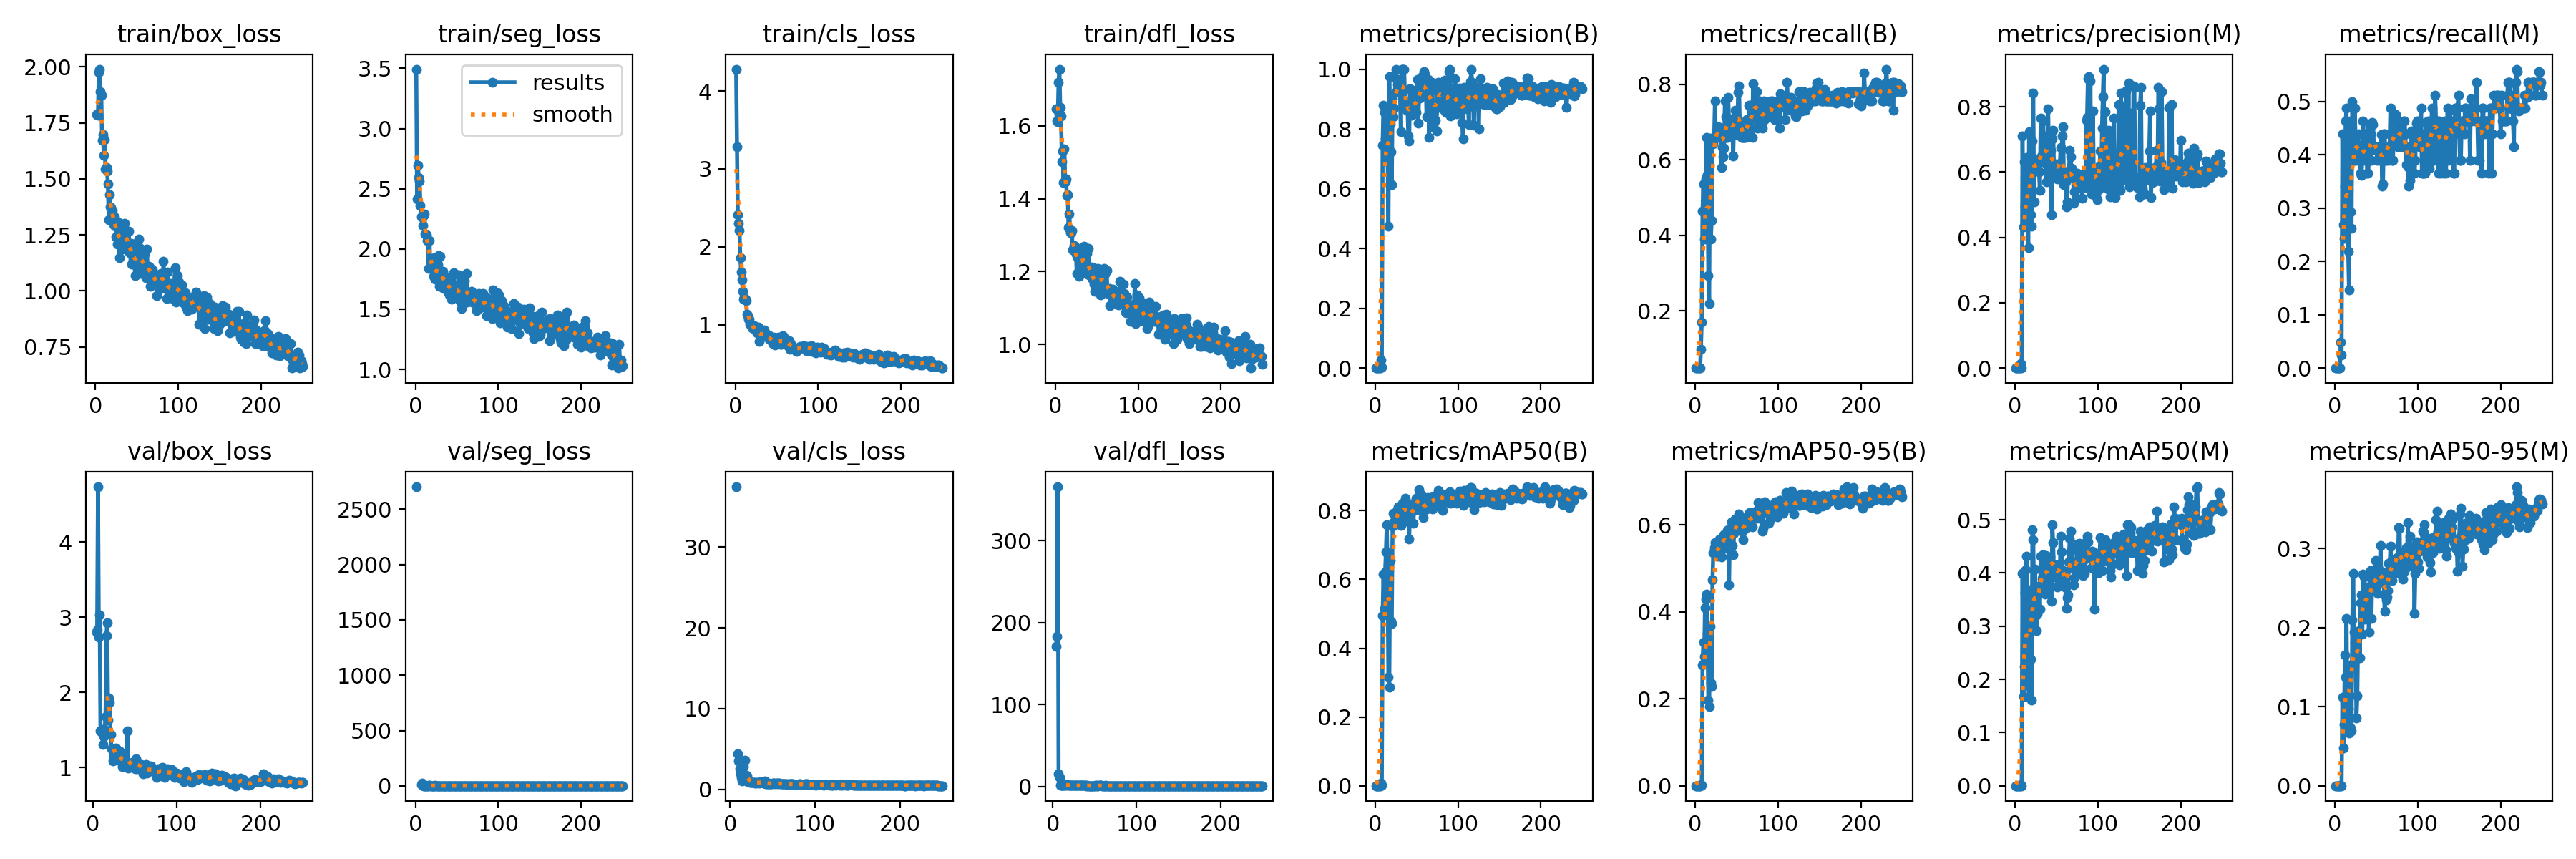

In [14]:
import cv2
import imutils
from google.colab.patches import cv2_imshow


img_path = "runs/segment/yolov8_lane_segmentation/results.png"
img = cv2.imread(img_path)

cv2_imshow(img)

Prediction - CLI

In [15]:
!yolo segment predict model="runs/segment/yolov8_lane_segmentation/weights/best.pt" source= "inference/test_images/0.jpg"

Ultralytics YOLOv8.0.218 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8l-seg summary (fused): 295 layers, 45912659 parameters, 0 gradients, 220.1 GFLOPs

image 1/1 /content/gdrive/MyDrive/YOLOv8 Projects/Self Driving Car Project/Lane Detection - Deep Learning/inference/test_images/0.jpg: 384x640 7 lanes, 116.2ms
Speed: 2.3ms preprocess, 116.2ms inference, 126.4ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/segment/predict3
💡 Learn more at https://docs.ultralytics.com/modes/predict


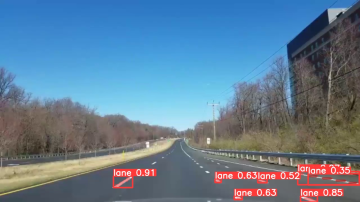

In [16]:
import cv2
import imutils
from google.colab.patches import cv2_imshow


img_path = "runs/segment/predict3/0.jpg"
img = cv2.imread(img_path)
img = imutils.resize(img, width=360)

cv2_imshow(img)

In [17]:
!yolo segment predict model="runs/segment/yolov8_lane_segmentation/weights/best.pt" source= "inference/test_images/0.jpg" --hide_labels=True --boxes=False

WARNING ⚠️ '--hide_labels=True' does not require leading dashes '--', updating to 'hide_labels=True'.
WARNING ⚠️ '--boxes=False' does not require leading dashes '--', updating to 'boxes=False'.
WARNING ⚠️ 'hide_labels' is deprecated and will be removed in 'ultralytics 8.2' in the future. Please use 'show_labels' instead.
WARNING ⚠️ 'boxes' is deprecated and will be removed in 'ultralytics 8.2' in the future. Please use 'show_boxes' instead.
Ultralytics YOLOv8.0.218 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8l-seg summary (fused): 295 layers, 45912659 parameters, 0 gradients, 220.1 GFLOPs

image 1/1 /content/gdrive/MyDrive/YOLOv8 Projects/Self Driving Car Project/Lane Detection - Deep Learning/inference/test_images/0.jpg: 384x640 7 lanes, 117.7ms
Speed: 2.2ms preprocess, 117.7ms inference, 129.9ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/segment/predict4
💡 Learn more at https://docs.ultralytics.com/modes/predict


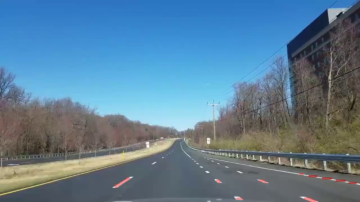

In [18]:
import cv2
import imutils
from google.colab.patches import cv2_imshow


img_path = "runs/segment/predict4/0.jpg"
img = cv2.imread(img_path)
img = imutils.resize(img, width=360)

cv2_imshow(img)

[INFO]... (720, 1280, 3)

0: 640x640 6 lanes, 75.8ms
Speed: 8.8ms preprocess, 75.8ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict7


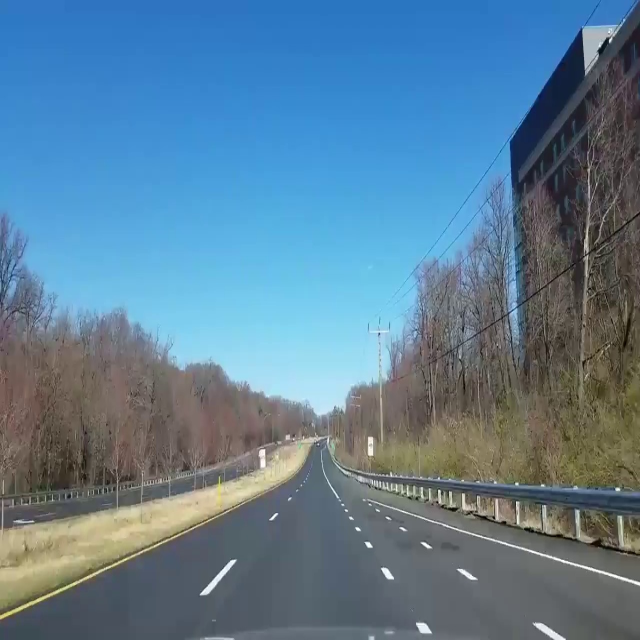

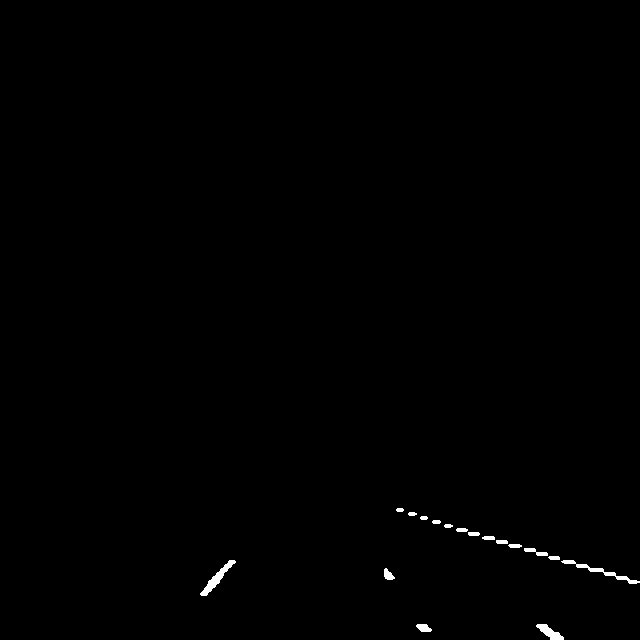

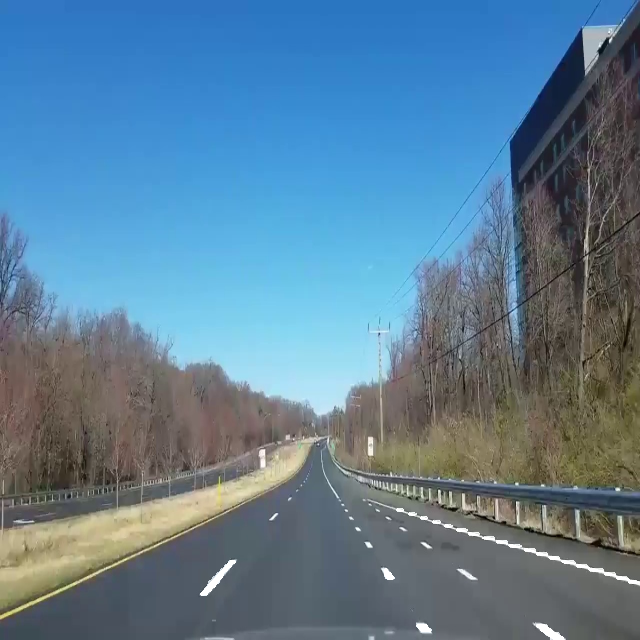

In [24]:
import cv2
import torch
import imutils

import numpy as np
from ultralytics import YOLO


img_path = "inference/test_images/0.jpg"
model_path = "runs/segment/yolov8_lane_segmentation/weights/best.pt"

img = cv2.imread(img_path)
print("[INFO]...",img.shape)

img = cv2.resize(img, (640,640))


model = YOLO(model_path) # imgz= 640

results = model.predict(source=img.copy(), save=True, save_txt=False, stream=True)

for result in results:
  masks = result.masks.data.cpu()
  boxes = result.boxes.data.cpu()
  clss = boxes[:, 5]

  road_indices = np.where(clss==0)
  lane_masks = masks[road_indices]

  lane_mask = torch.any(lane_masks, dim=0).int()*255
  lane_mask = lane_mask.cpu().numpy()
  lane_mask = lane_mask.astype(np.uint8)


lane_mask_color = cv2.cvtColor(lane_mask, cv2.COLOR_GRAY2BGR)
result_img = cv2.addWeighted(img, 1, lane_mask_color, 0.5, 0)

cv2_imshow(img)
cv2_imshow(lane_mask)
cv2_imshow(result_img)

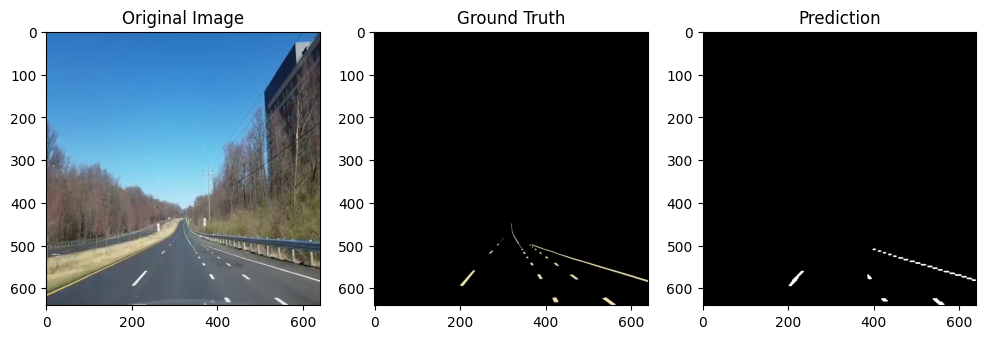

In [27]:
import matplotlib.pyplot as plt


img_path = "inference/test_images/0.jpg"
img = cv2.imread(img_path) # BGR
img = cv2.resize(img, (640,640))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


ground_truth_path = "inference/test_images/ground_truth/0.png"
ground_truth = cv2.imread(ground_truth_path)
ground_truth = cv2.resize(ground_truth, (640,640))


plt.figure(figsize=(12,6))

plt.subplot(131)
plt.imshow(img)
plt.title('Original Image')


plt.subplot(132)
plt.imshow(ground_truth) # RGB
plt.title('Ground Truth')

plt.subplot(133)
plt.imshow(lane_mask, cmap="gray")
plt.title('Prediction')

plt.show()

Error & Solution

In [5]:
!yolo segment predict model="runs/segment/yolov8_lane_segmentation/weights/best.pt" source="inference/test.mp4" --hide_labels=True --boxes=False

WARNING ⚠️ '--hide_labels=True' does not require leading dashes '--', updating to 'hide_labels=True'.
WARNING ⚠️ '--boxes=False' does not require leading dashes '--', updating to 'boxes=False'.
WARNING ⚠️ 'hide_labels' is deprecated and will be removed in 'ultralytics 8.2' in the future. Please use 'show_labels' instead.
WARNING ⚠️ 'boxes' is deprecated and will be removed in 'ultralytics 8.2' in the future. Please use 'show_boxes' instead.
Ultralytics YOLOv8.0.218 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8l-seg summary (fused): 295 layers, 45912659 parameters, 0 gradients, 220.1 GFLOPs

video 1/1 (1/891) /content/gdrive/MyDrive/YOLOv8 Projects/Self Driving Car Project/Lane Detection - Deep Learning/inference/test.mp4: 384x640 7 lanes, 112.2ms
video 1/1 (2/891) /content/gdrive/MyDrive/YOLOv8 Projects/Self Driving Car Project/Lane Detection - Deep Learning/inference/test.mp4: 384x640 5 lanes, 49.2ms
video 1/1 (3/891) /content/gdrive/MyDrive/YOLOv8 Projects/Sel

In [7]:
from google.colab import files
files.download("runs/segment/predict8/test.avi")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# # # # # # # # # # # #
# 1. Dataset (75 -> 400) ***
# 2. Image Data Augmentation **
# 3. Hyperparameter Tuning *
# # # # # # # # # # # #